In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

data = pd.read_csv('insurance.csv')

In [30]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
age = data.iloc[:,:1].values
charges = data.iloc[:,-1].values

print(str(age[0]) + " " + str(charges[0]))


[19] 16884.924


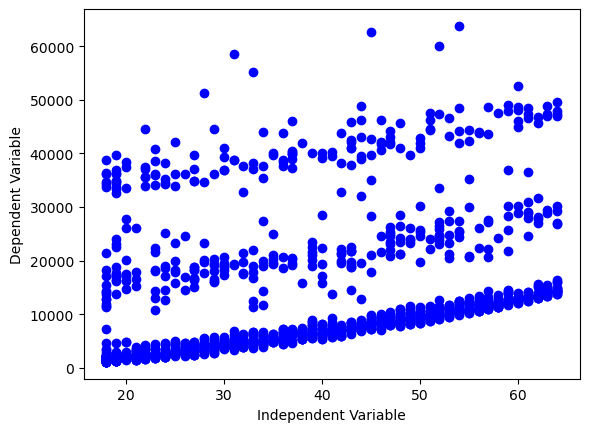

In [32]:

plt.scatter(age,charges,color = 'b')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [33]:
regression_model = LinearRegression()
regression_model.fit(age,charges)

LinearRegression()

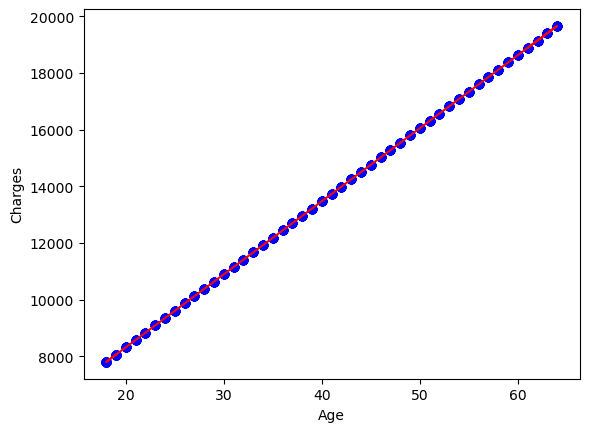

In [34]:
charges_pred = regression_model.predict(age)

plt.scatter(age, charges_pred,color = 'b')
plt.plot(age,charges_pred,color = 'r')
plt.ylabel('Charges')
plt.xlabel('Age')
plt.show()

# Now repeat but using BMI to see how the BMI of a person affects their insurance prices.

In [51]:
bmi = data.loc[:,"bmi"].values
charges = data.loc[:, "charges"].values

print(str(bmi[0]) + " " + str(charges[0]))

27.9 16884.924


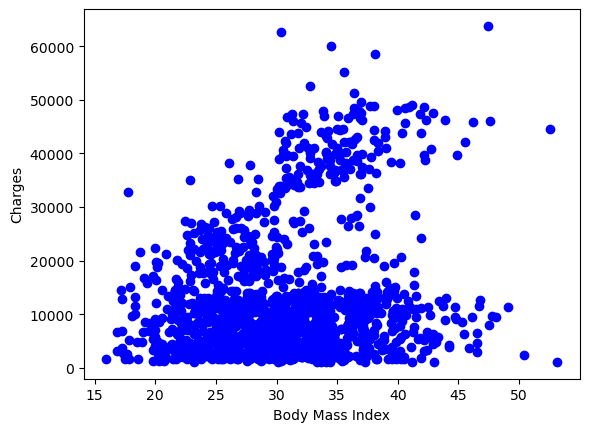

In [52]:

plt.scatter(bmi,charges,color = 'b')
plt.xlabel('Body Mass Index')
plt.ylabel('Charges')
plt.show()

In [54]:
regression_model = LinearRegression()
bmi = bmi.reshape(-1, 1)
regression_model.fit(bmi,charges)

LinearRegression()

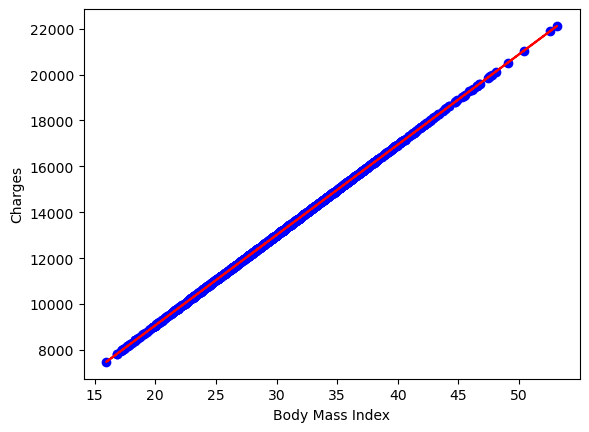

In [57]:
charges_pred = regression_model.predict(bmi)

plt.scatter(bmi, charges_pred,color = 'b')
plt.plot(bmi,charges_pred,color = 'r')
plt.ylabel('Charges')
plt.xlabel('Body Mass Index')
plt.show()